# Neural Network - MLP - Wrapup

# Recap what we have done sofar and then review and implementation

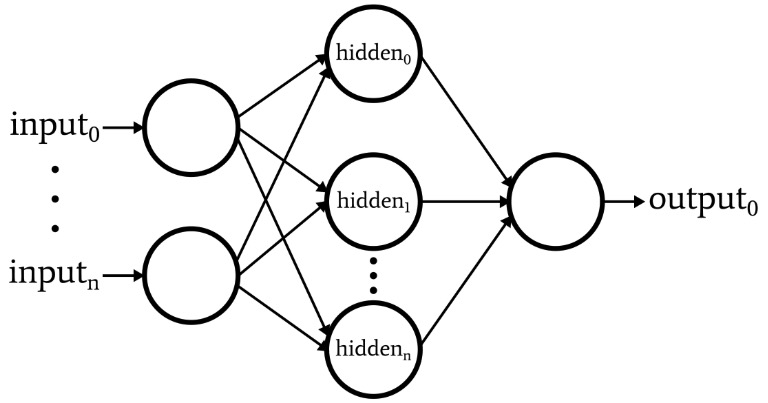

### The figure above shows the standard architecture of a MLP. Here are some basic points to recap


* The number of input nodes is variable depending on the Training data. to classify.
* The code we will study does not support multiple hidden layers. At this point one hidden layer is enough for extremely powerful classification.
* Like in the Input Layer, the number of nodes within the one hidden layer is variable. Finding the optimal number of hidden nodes involves some trial and error,
* The number of output nodes is one in our case for simplicity. 
* The activation function for both hidden and output nodes will be the standard logistic sigmoid relationship:

                      f(x) = 1/ (1 + e**(-x))


In the previous section, we saw that a node’s **Preactivation Signal** is computed by performing a **dot product**—i.e., you multiply the corresponding elements of two arrays (or vectors, if you prefer) and then add up all the individual products. 

The first array holds the **Postactivation values** from the preceding layer, and 

the second array holds the **weights that connect the preceding layer to the current layer**. 

Thus, if the preceding-layer postactivation array is denoted by x and the weight vector is denoted by w, a preactivation value is calculated as follows:

      S(preA) = w * x = SUM(w1*x1 + w2*x2 + ......wn * xn)
      
With the addition of a **Bias Node** this equation changes to

     S(preA) = (w * x) + b = SUM(w1*x1 + w2*x2 + ......wn * xn) + b

A **bias** shifts the signal that is processed by the activation function, and it can thereby make the network more flexible by making the fitting line closer to the actual training data points. 

This is similar tp the “y-intercept” in the standard equation for a straight line: **y = mx + b**. 

The bias is like a y-intercept, and the array of weights is equivalent to a slope:

Before looking at the code we need to refresh our memory of the **Messay Color figure** and the equeations we saw in previous section.




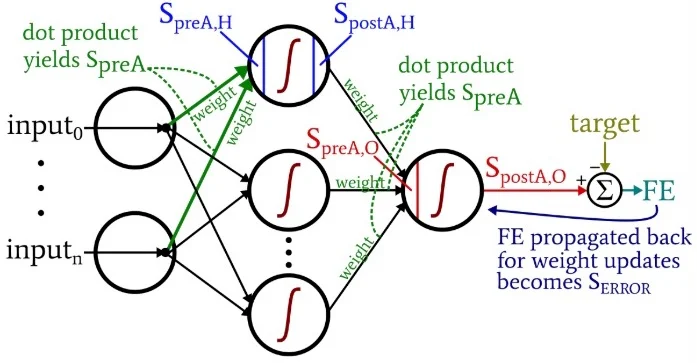

For the hidden-to-output weights, we have the following:

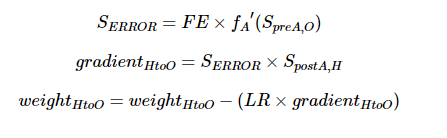



We calculate the Error Signal by multiplying the Final Error by the derivative of the activation function to the preactivation signal delivered to the output node
The Gradient is then calculated by multiplying the Error Signal by the postactivation signal from the hidden layer.
Finally, we update the weight by subtracting this gradient from the current weight value, and we can multiply the gradient by the learning rate if we want to change the step size.
For the input-to-hidden weights, we have this:

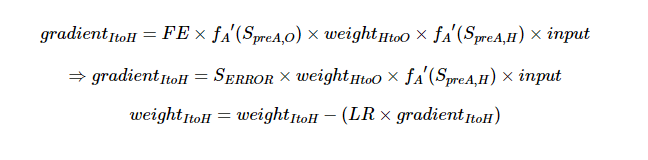

The code that implements these equations in Python is in **MLP_v1.py**

### We will not run the code as it requires creation of the test data sets and will throw erros

### Instead we will take a look at some examples of MLP using scikit-learn where all the hard work will be done behind the scene by the scikit-learn library

In [10]:
LR = 1   

I_dim = 3
H_dim = 4

epoch_count = 1

#np.random.seed(1)
weights_ItoH = np.random.uniform(-1, 1, (I_dim, H_dim))
weights_HtoO = np.random.uniform(-1, 1, H_dim)

preActivation_H = np.zeros(H_dim)
postActivation_H = np.zeros(H_dim)

training_data = pandas.read_excel('MLP_Tdata.xlsx')
target_output = training_data.output
training_data = training_data.drop(['output'], axis=1)
training_data = np.asarray(training_data)
training_count = len(training_data[:,0])

validation_data = pandas.read_excel('MLP_Vdata.xlsx')
validation_output = validation_data.output
validation_data = validation_data.drop(['output'], axis=1)
validation_data = np.asarray(validation_data)
validation_count = len(validation_data[:,0])

#####################
#training
#####################
for epoch in range(epoch_count):
    for sample in range(training_count):
        for node in range(H_dim):
            preActivation_H[node] = np.dot(training_data[sample,:], weights_ItoH[:, node])
            postActivation_H[node] = logistic(preActivation_H[node])
            
        preActivation_O = np.dot(postActivation_H, weights_HtoO)
        postActivation_O = logistic(preActivation_O)
        
        FE = postActivation_O - target_output[sample]
        
        for H_node in range(H_dim):
            S_error = FE * logistic_deriv(preActivation_O)
            gradient_HtoO = S_error * postActivation_H[H_node]
                       
            for I_node in range(I_dim):
                input_value = training_data[sample, I_node]
                gradient_ItoH = S_error * weights_HtoO[H_node] * logistic_deriv(preActivation_H[H_node]) * input_value
                
                weights_ItoH[I_node, H_node] -= LR * gradient_ItoH
                
            weights_HtoO[H_node] -= LR * gradient_HtoO

#####################
#validation
#####################            
correct_classification_count = 0
for sample in range(validation_count):
    for node in range(H_dim):
        preActivation_H[node] = np.dot(validation_data[sample,:], weights_ItoH[:, node])
        postActivation_H[node] = logistic(preActivation_H[node])
            
    preActivation_O = np.dot(postActivation_H, weights_HtoO)
    postActivation_O = logistic(preActivation_O)
        
    if postActivation_O > 0.5:
        output = 1
    else:
        output = 0     
        
    if output == validation_output[sample]:
        correct_classification_count += 1

print('Percentage of correct classifications:')
print(correct_classification_count*100/validation_count)

NameError: name 'np' is not defined

## With all the complicated (and boring??) theory behind us let's take the easy way of doing the same using "sklearn" where all the hard stuff will be done for us behind the scene



# Regression Example

## We will load the California Housing dataset and as always split the dataset into Training and Testing datasets


In [8]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [11]:
# Import the necessary libraries and the required dataset

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import pandas as pd

cal_housing = fetch_california_housing()

print('The California Housing Dataset')
housing_data = pd.DataFrame(cal_housing.data)
housing_data.columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Lattitude', 'Longitude']
housing_data.head(10)

print('The Target or the data to predict on')
housing_data_target = pd.DataFrame(cal_housing.target)
housing_data_target.columns = ['Average Price(000,000)']
housing_data_target.head(10)

X = pd.DataFrame(cal_housing.data,columns=cal_housing.feature_names)
y = cal_housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1, test_size=0.2)

# Scale the data using Standard Scaler

sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

# In the below code, three hidden layers are modelled, with 64 neurons in each layer. 
# Considering the input and output layer, we have a total of 5 layers in the model. 

reg = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000).fit(X_trainscaled, y_train)
y_pred=reg.predict(X_testscaled)

print("The R2 Score ", (r2_score(y_pred, y_test)))


The California Housing Dataset


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Lattitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


The Target or the data to predict on


,"Average Price(000,000)"
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
5,2.697
6,2.992
7,2.414
8,2.267
9,2.611


The R2 Score  0.7633133194209716


# Classification Example

## We wil load the Iris dataset, checkout the data and split the data, as always, into Training and Testing datasets


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



Text(0.5, 1.0, 'Confusion matrix for Iris Data Classifier')

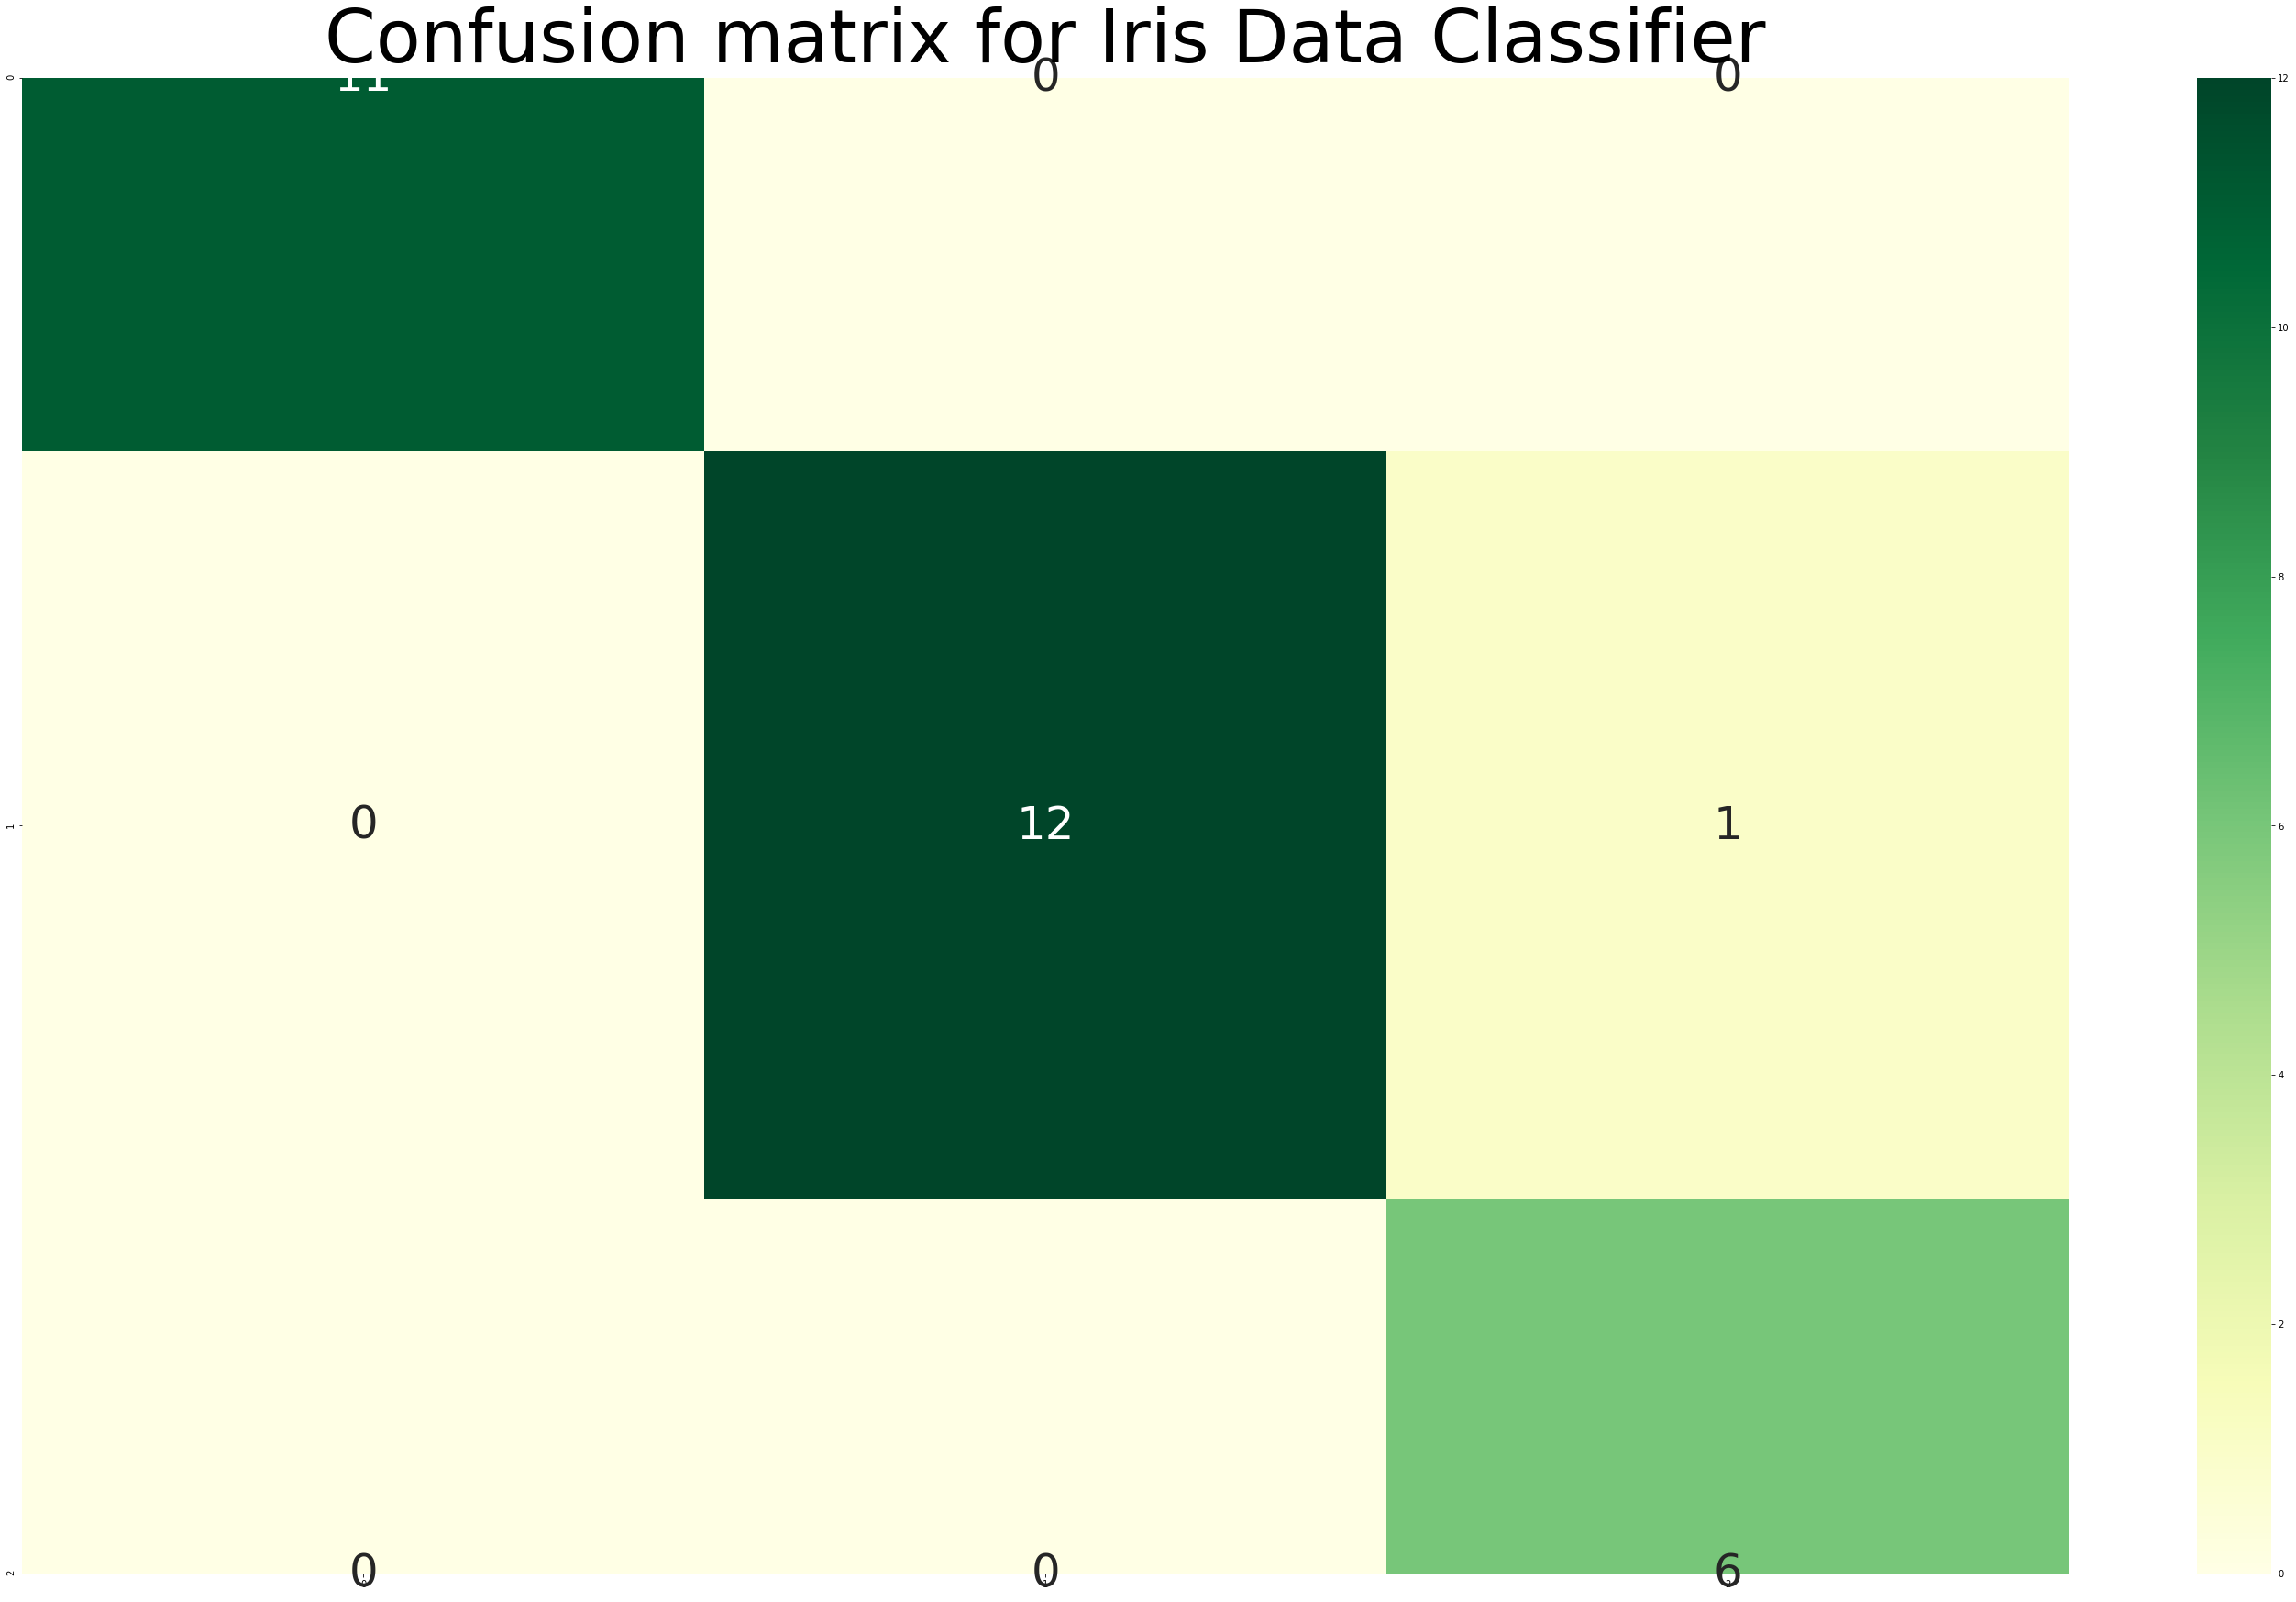

In [13]:
# Import the necessary libraries and load the Iris data

from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style("whitegrid")
%matplotlib inline
plt.rcParams["figure.figsize"]=50, 30


iris_data = load_iris()
X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
y = iris_data.target

X.head(10)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.2)
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=1).fit(X_trainscaled, y_train)
y_pred=clf.predict(X_testscaled)
print(clf.score(X_testscaled, y_test))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

plt.title('Confusion matrix for Iris Data Classifier', size=80)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGn", annot_kws={"size": 50})